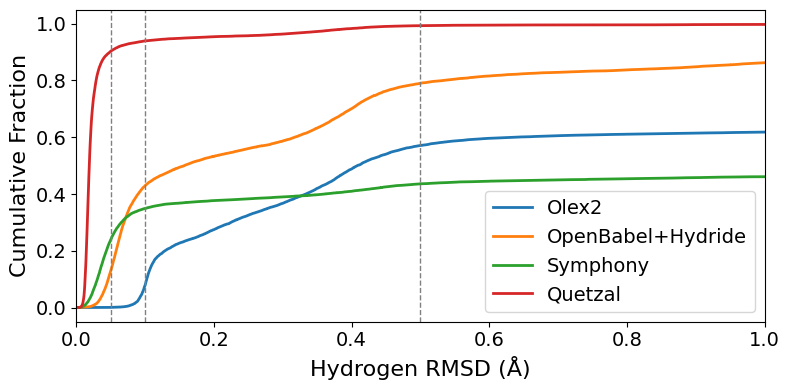

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get tab10 colormap
colors = plt.cm.tab10.colors

path = "samples/hdeco"
methods = ["olex2", "obabel_hydride", "symphony", "quetzal"]
labels = ["Olex2", "OpenBabel+Hydride", "Symphony", "Quetzal"]

# Load RMSD data for each method
rmsd_data = {}
for method in methods:
    rmsds = np.load(f"../../{path}/{method}/rmsds.npy")
    rmsd_data[method] = rmsds


plt.figure(figsize=(8, 4))
for i, (method, label) in enumerate(zip(methods, labels)):
    sorted_rmsds = np.sort(rmsd_data[method])
    cdf = np.arange(1, len(sorted_rmsds) + 1) / len(sorted_rmsds)
    plt.plot(sorted_rmsds, cdf, label=label, color=colors[i], linewidth=2)

plt.axvline(0.05, color='gray', linestyle='--', linewidth=1)
plt.axvline(0.1, color='gray', linestyle='--', linewidth=1)
plt.axvline(0.5, color='gray', linestyle='--', linewidth=1)

plt.legend(fontsize=14)
plt.xlabel('Hydrogen RMSD (Å)', fontsize=16)
plt.ylabel('Cumulative Fraction', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig("hdeco_rmsd_cdf.png", dpi=300)
plt.show()
